In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_stopwords(df, col)
#        soon    possible
df = tp.remove_extra_spaces(df, col)
# soon possible
# '''

# features + NLP word embeddings

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_stopwords(df, col)\n#        soon    possible\ndf = tp.remove_extra_spaces(df, col)\n# soon possible\n# '

In [1]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [2]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

========================= DecisionTree =========================
Elapsed Time: 34.4612 seconds
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=32)
Train Accuracy: 0.7125, F1: [0.76   0.656  0.7356 0.6828]
Test  Accuracy: 0.4767, F1: [0.5156 0.303  0.5682 0.4615]


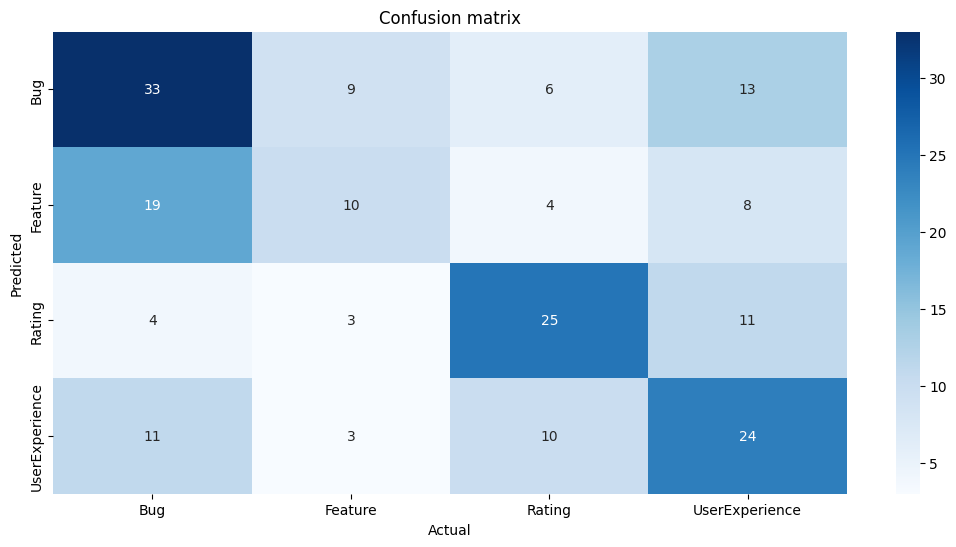

========================= LSVM =========================
Elapsed Time: 143.1524 seconds
LinearSVC(C=0.1, dual=False, penalty='l1')
Train Accuracy: 0.772, F1: [0.7605 0.6489 0.8275 0.8171]
Test  Accuracy: 0.6632, F1: [0.7132 0.5823 0.6429 0.6809]


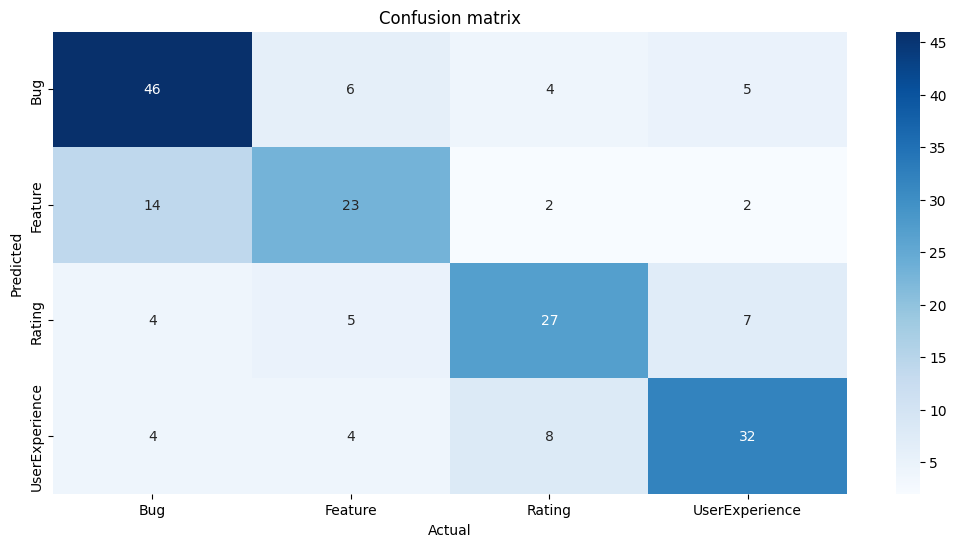

========================= RandomForest =========================
Elapsed Time: 199.4257 seconds
RandomForestClassifier(criterion='entropy', max_depth=33, min_samples_leaf=5,
                       min_samples_split=17, n_estimators=800)
Train Accuracy: 0.9698, F1: [0.9711 0.9869 0.9601 0.9643]
Test  Accuracy: 0.5699, F1: [0.6277 0.3729 0.5814 0.5962]


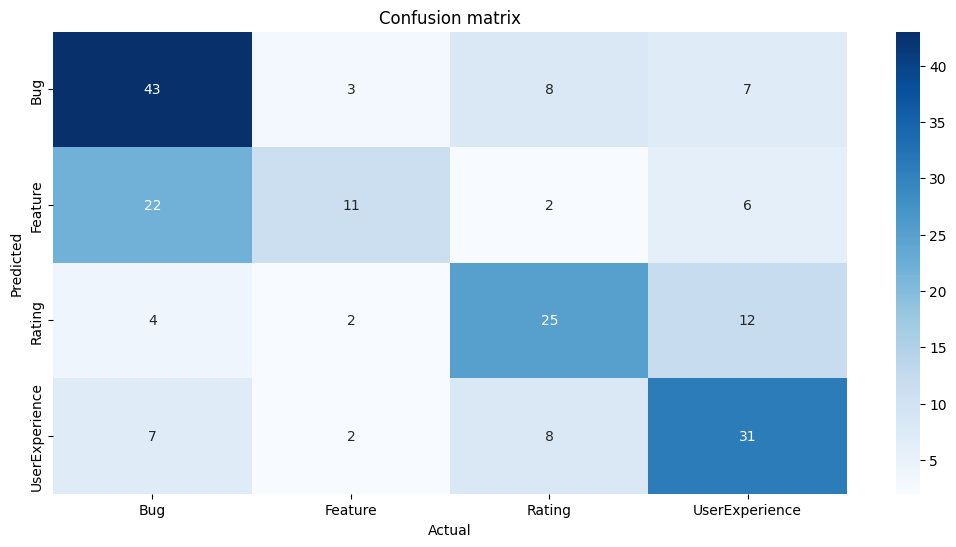

========================= AdaBoost =========================
Elapsed Time: 75.8688 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10))
Train Accuracy: 0.9954, F1: [0.995  1.     0.993  0.9946]
Test  Accuracy: 0.5544, F1: [0.6056 0.3438 0.5897 0.5882]


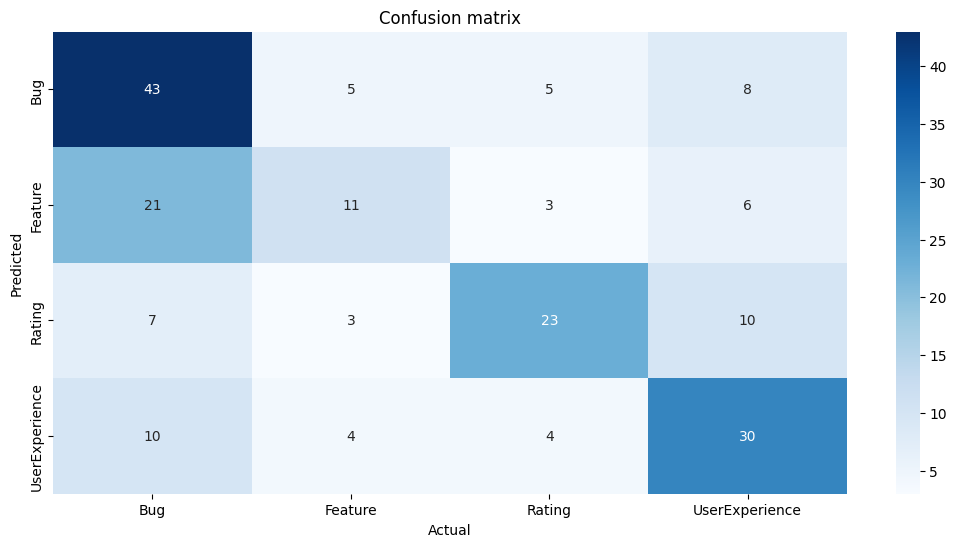

========================= XGBoost =========================
Elapsed Time: 330.5936 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8661385407395407, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.3907061849242187, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.09157341998177139, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=106, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.8709, F1: [0.8713 0.846  0.8889 0.8718]
Test  Accuracy: 0.5959, F1: [0.6142 0.4474 0.6364 0.6526]


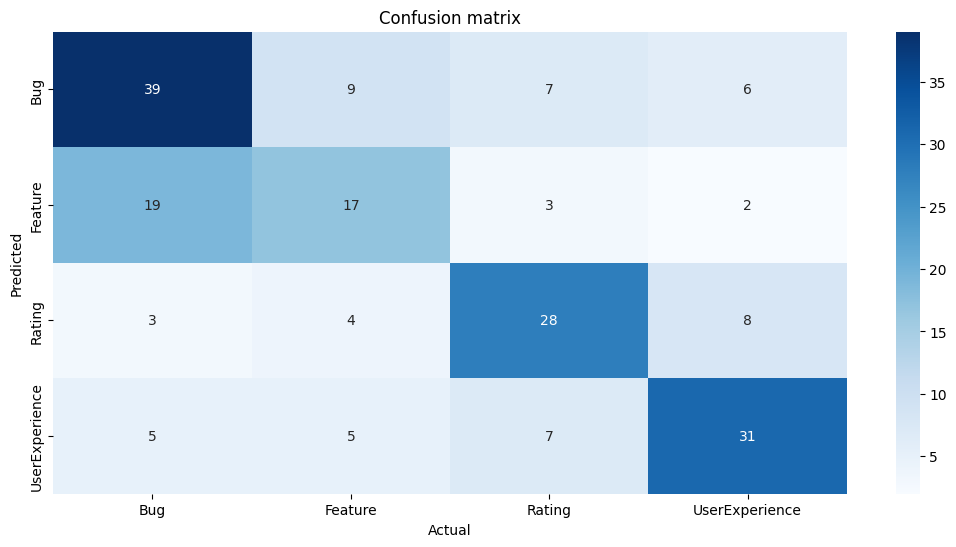

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)